In [1]:
# pip install control

In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Funções de Transferência

#### Planta

In [3]:
km = 1.6 #const. mola
massa = 1
fv = 0.2 #const. amortecedor

Wn = np.sqrt(km/massa) #frequência natural
eta = fv/massa/(2*Wn) # const. amortecimento

Tsim = 15 #tempo simulação

s = ctl.TransferFunction.s
P_s = 1/(massa*s**2+fv*s+km)
print("FT malha aberta: ", P_s)

FT malha aberta:  
        1
-----------------
s^2 + 0.2 s + 1.6



#### Controlador PID

In [4]:
Ki = 6
Kp = 10
Kd = 20

C_s = (Kd*s**2 + Kp*s + Ki) / s   #FT controlador PID

#### Sensor

In [5]:
H_s = 1/1

# Malha Fechada

In [6]:
Parte_superior = ctl.series(C_s, P_s) #Controlador * Planta

G1_s = ctl.feedback(Parte_superior, H_s, sign = -1) # Adiciona sensor (feedback)

# Resposta ao degrau

Text(0.5, 1.0, 'Sistema de 2ª ordem')

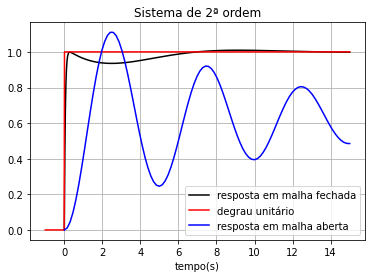

In [7]:
#Respostas ao degrau
T, yout = ctl.step_response(P_s, Tsim)
T_mf, you_mf = ctl.step_response(G1_s, Tsim)

#Função degrau unitário
T2 = np.linspace(-1, Tsim, 1000)
degrau = np.ones_like(T2)
degrau[T2<0] = 0

#Plot resultados
plt.plot(T_mf, you_mf, 'k-')
plt.plot(T2, degrau, 'r-')
plt.plot(T, yout, 'b-')
plt.xlabel('tempo(s)')
plt.legend(['resposta em malha fechada', 'degrau unitário', 'resposta em malha aberta'])
plt.grid()
plt.title('Sistema de 2ª ordem')